In [154]:
# import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [135]:
# display dataset as a Pandas DataFrame

data = pd.read_csv('Resources/COVID_staff_shortages.csv')
data

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,ME,2021/01/23,1,30,8,2,29,8,3.0,38,...,NaN,0,NaN,0,NaN,0,47.0,38,60.0,38
1,SD,2021/01/23,2,60,3,2,60,3,27.0,62,...,NaN,0,NaN,0,NaN,0,36.0,62,83.0,62
2,MD,2021/01/22,2,57,1,2,57,1,31.0,59,...,NaN,0,NaN,0,NaN,0,172.0,59,240.0,59
3,RI,2021/01/22,6,8,1,6,8,1,6.0,14,...,NaN,0,NaN,0,NaN,0,62.0,14,93.0,14
4,ID,2021/01/21,4,40,8,5,39,8,0.0,51,...,NaN,0,NaN,0,NaN,0,82.0,30,230.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54006,MT,2021/03/29,6,58,1,7,57,1,3.0,64,...,NaN,0,NaN,0,NaN,0,8.0,9,18.0,9
54007,NJ,2021/03/09,9,61,8,10,60,8,76.0,77,...,NaN,0,NaN,0,NaN,0,49.0,24,107.0,24
54008,NM,2021/05/19,12,43,1,16,39,1,2.0,55,...,NaN,0,NaN,0,NaN,0,0.0,19,0.0,19
54009,NE,2021/04/15,9,91,1,16,84,1,1.0,100,...,NaN,0,NaN,0,NaN,0,0.0,12,0.0,12


In [136]:
# explore the data
states_data = data[["state", "critical_staffing_shortage_today_yes", "inpatient_beds", "inpatient_beds_used"]]
states_data

,state,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used
0,ME,1,3229.0,2231.0
1,SD,2,2868.0,1641.0
2,MD,2,11827.0,9635.0
3,RI,6,2402.0,2445.0
4,ID,4,3694.0,2268.0
...,...,...,...,...
54006,MT,6,2938.0,1762.0
54007,NJ,9,21569.0,15395.0
54008,NM,12,4446.0,3181.0
54009,NE,9,4368.0,2958.0


In [137]:
avg_states_data = states_data.groupby(["state"]).mean().head(100)
avg_states_data.head()

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used
state,,,
AK,1.632114,1600.081301,1084.013211
AL,15.566604,13320.209193,10315.438806
AR,12.816184,8358.250749,5763.789211
AS,0.006452,150.000000,67.913978
AZ,16.815920,14717.461692,10900.769154


In [138]:
len(avg_states_data.index)

54

In [139]:
number = pd.read_csv("/Users/iqraimam/Desktop/healthcare_module7/state_hospital.csv")
number

,state,number of hospitals
0,AK,11
1,AL,90
2,AR,52
3,AS,1
4,AZ,76
5,CA,339
6,CO,59
7,CT,35
8,DC,7
9,DE,8


In [140]:
nn = number.drop([12,27], axis = 0)
nn

,state,number of hospitals
0,AK,11
1,AL,90
2,AR,52
3,AS,1
4,AZ,76
5,CA,339
6,CO,59
7,CT,35
8,DC,7
9,DE,8


In [141]:
nn['state'] = nn['state'].str.strip()
nn

,state,number of hospitals
0,AK,11
1,AL,90
2,AR,52
3,AS,1
4,AZ,76
5,CA,339
6,CO,59
7,CT,35
8,DC,7
9,DE,8


In [142]:
state_hospitals = nn.set_index("state")
state_hospitals

,number of hospitals
state,
AK,11
AL,90
AR,52
AS,1
AZ,76
CA,339
CO,59
CT,35
DC,7


In [143]:
len(state_hospitals.index)

54

In [144]:
combined_data = pd.merge(avg_states_data, state_hospitals, on = 'state', how = 'inner', indicator = False)
combined_data.head()


,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used,number of hospitals
state,,,,
AK,1.632114,1600.081301,1084.013211,11
AL,15.566604,13320.209193,10315.438806,90
AR,12.816184,8358.250749,5763.789211,52
AS,0.006452,150.000000,67.913978,1
AZ,16.815920,14717.461692,10900.769154,76


In [145]:
len(combined_data.index)

54

In [146]:
state_hospitals_df = state_hospitals.astype({'number of hospitals':'float'})
state_hospitals_df.head()

,number of hospitals
state,
AK,11.0
AL,90.0
AR,52.0
AS,1.0
AZ,76.0


In [147]:
avg_states_data.head()

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used
state,,,
AK,1.632114,1600.081301,1084.013211
AL,15.566604,13320.209193,10315.438806
AR,12.816184,8358.250749,5763.789211
AS,0.006452,150.000000,67.913978
AZ,16.815920,14717.461692,10900.769154


In [149]:
st_hosp_data = avg_states_data.join(state_hospitals_df)
st_hosp_data

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used,number of hospitals
state,,,,
AK,1.632114,1600.081301,1084.013211,11.0
AL,15.566604,13320.209193,10315.438806,90.0
AR,12.816184,8358.250749,5763.789211,52.0
AS,0.006452,150.000000,67.913978,1.0
AZ,16.815920,14717.461692,10900.769154,76.0
CA,53.813056,60895.349159,45195.508408,339.0
CO,10.094663,10495.660624,7079.485398,59.0
CT,1.430738,7979.054601,5988.456016,35.0
DC,0.241062,3337.307457,2584.858018,7.0


In [121]:
new_table = state_hospitals_df.join(avg_states_data)
new_table.head()

,number of hospitals,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used
state,,,,
AK,11.0,NaN,NaN,NaN
AL,90.0,NaN,NaN,NaN
AR,52.0,12.816184,8358.250749,5763.789211
AS,1.0,NaN,NaN,NaN
AZ,76.0,16.815920,14717.461692,10900.769154


In [125]:
merge = avg_states_data.join(state_hospitals_df, how = 'inner')
merge

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used,number of hospitals
state,,,,
AR,12.816184,8358.250749,5763.789211,52.0
AZ,16.815920,14717.461692,10900.769154,76.0
CO,10.094663,10495.660624,7079.485398,59.0
FL,12.648241,56613.609045,41849.732663,221.0
GA,27.690855,20349.041750,15723.673956,112.0
ID,2.573441,3389.366197,2058.717304,18.0
IN,13.698874,15502.007505,10349.705441,100.0
KY,11.526839,12205.000000,8276.434394,73.0
LA,26.145401,12191.365805,8362.198807,109.0


In [127]:
set(state_hospitals_df.index)

{'AK ',
 'AL ',
 'AR',
 'AS ',
 'AZ',
 'CA ',
 'CO',
 'CT ',
 'DC ',
 'DE ',
 'FL',
 'GA',
 'HI ',
 'IA ',
 'ID',
 'IL ',
 'IN',
 'KS ',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC ',
 'ND',
 'NE',
 'NH',
 'NJ ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA ',
 'PR',
 'RI',
 'SC ',
 'SD ',
 'TN ',
 'TX',
 'UT',
 'VA ',
 'VI ',
 'VT',
 'WA ',
 'WI',
 'WV',
 'WY '}

In [151]:
st_hosp_data

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used,number of hospitals
state,,,,
AK,1.632114,1600.081301,1084.013211,11.0
AL,15.566604,13320.209193,10315.438806,90.0
AR,12.816184,8358.250749,5763.789211,52.0
AS,0.006452,150.000000,67.913978,1.0
AZ,16.815920,14717.461692,10900.769154,76.0
CA,53.813056,60895.349159,45195.508408,339.0
CO,10.094663,10495.660624,7079.485398,59.0
CT,1.430738,7979.054601,5988.456016,35.0
DC,0.241062,3337.307457,2584.858018,7.0


Text(0, 0.5, 'Averages Shortages per Day')

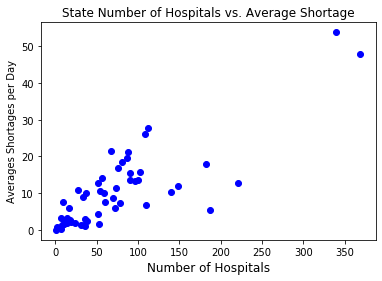

In [152]:
# Scatter plot of number of hospitals vs. avg shortage

marker_size=10
plt.scatter(st_hosp_data['number of hospitals'],st_hosp_data['critical_staffing_shortage_today_yes'], color="blue")
plt.title('State Number of Hospitals vs. Average Shortage')
plt.xlabel('Number of Hospitals',fontsize =12)
plt.ylabel('Average Shortages per Day')


The r-squared is: 0.673


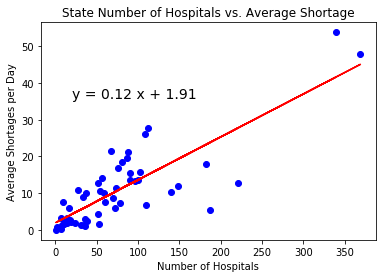

In [155]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(st_hosp_data["number of hospitals"],st_hosp_data["critical_staffing_shortage_today_yes"])
regress_values=st_hosp_data["number of hospitals"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(st_hosp_data["number of hospitals"],st_hosp_data["critical_staffing_shortage_today_yes"],color='b')
plt.plot(st_hosp_data["number of hospitals"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Number of Hospitals")
plt.ylabel("Average Shortages per Day")
plt.title("State Number of Hospitals vs. Average Shortage")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()